Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\samya\PyCharmProject\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv')

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [5]:
crosstab_result = pd.crosstab(df['category'],df['isBestSeller'])

In [26]:
crosstab_result.sort_values(True, ascending=False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Blank Media Cases & Wallets,243,0
Boating Footwear,140,0
Boxes & Organisers,911,0


In [7]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestseller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(np.float64(36540.20270061387), np.float64(0.0))

In [8]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

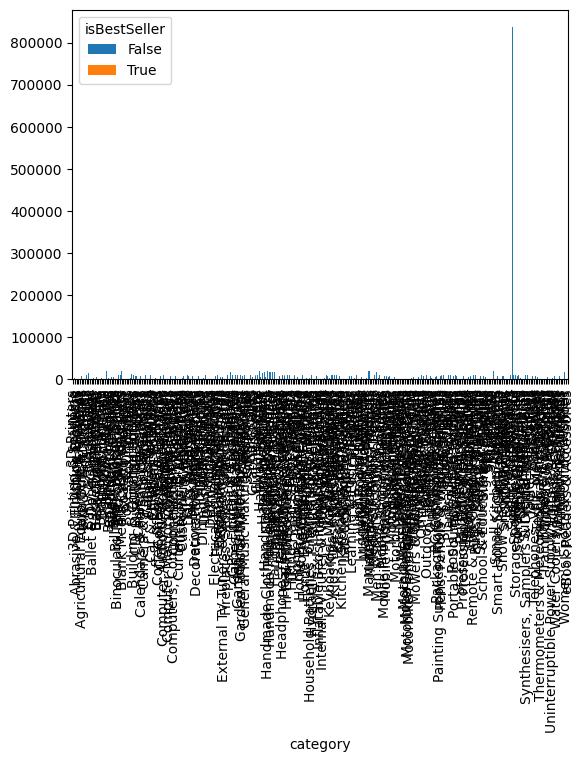

In [9]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)

<Axes: xlabel='category', ylabel='count'>

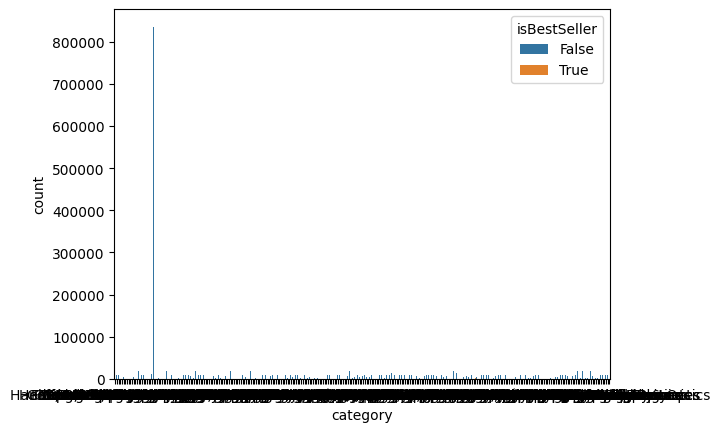

In [27]:
# Plotting a grouped bar chart
sns.countplot(data=df, x='category', hue='isBestSeller')

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

In [12]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]



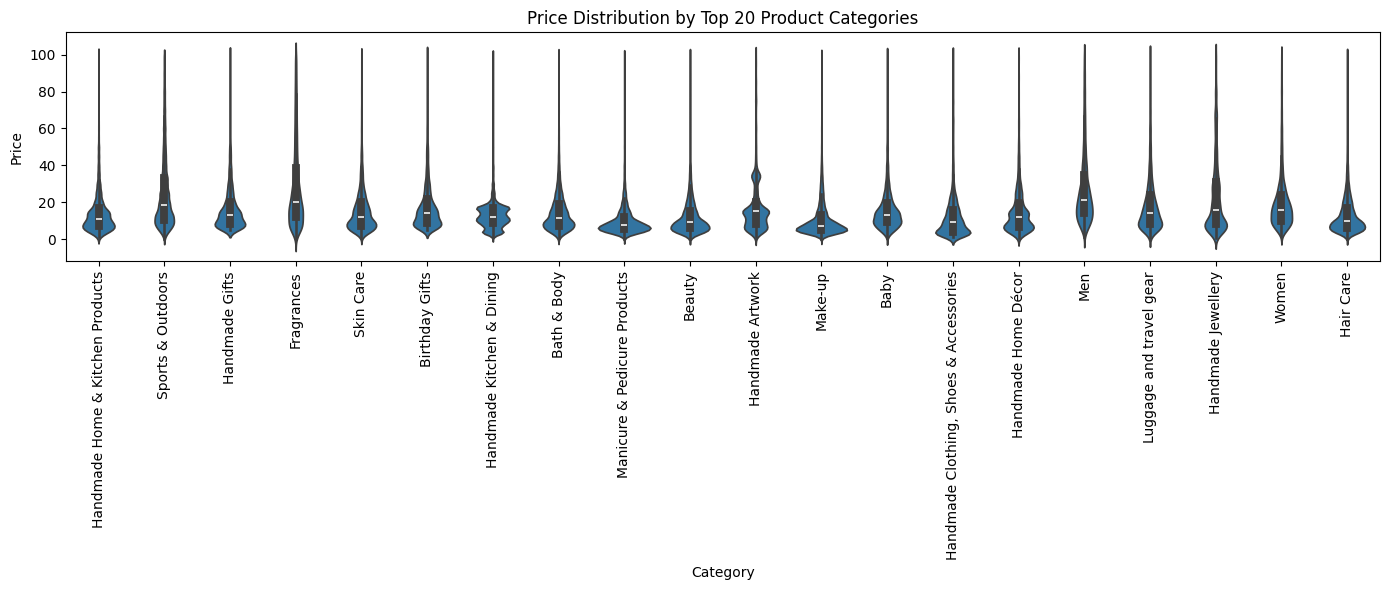

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 20 categories by count
top20_categories = df_no_outliers['category'].value_counts().nlargest(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top20_categories)]

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(x='category', y='price', data=df_top20)
plt.xticks(rotation=90)
plt.title('Price Distribution by Top 20 Product Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [28]:
median_prices = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
print("Top categories by median price:\n", median_prices.head())


Top categories by median price:
 category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64


C:\Users\samya\AppData\Local\Temp\ipykernel_5680\3905569206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")


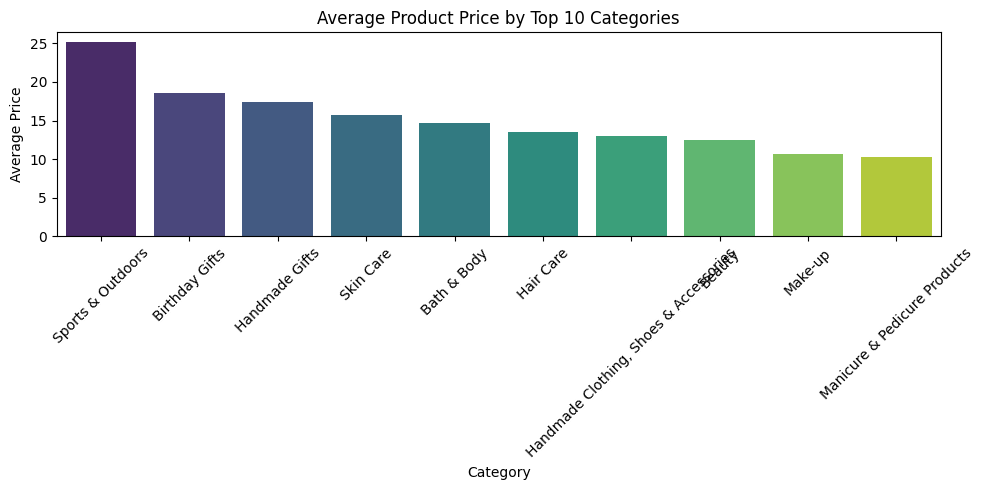

In [29]:
# Average price for top 10 categories
top10_categories = df_no_outliers['category'].value_counts().nlargest(10).index
avg_price = df_no_outliers[df_no_outliers['category'].isin(top10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")
plt.title('Average Product Price by Top 10 Categories')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
print(df_rating_top10.columns)


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [31]:
print(df_rating_top10['stars'].isna().sum())
print(df_rating_top10['stars'].notna().sum())


0
862465


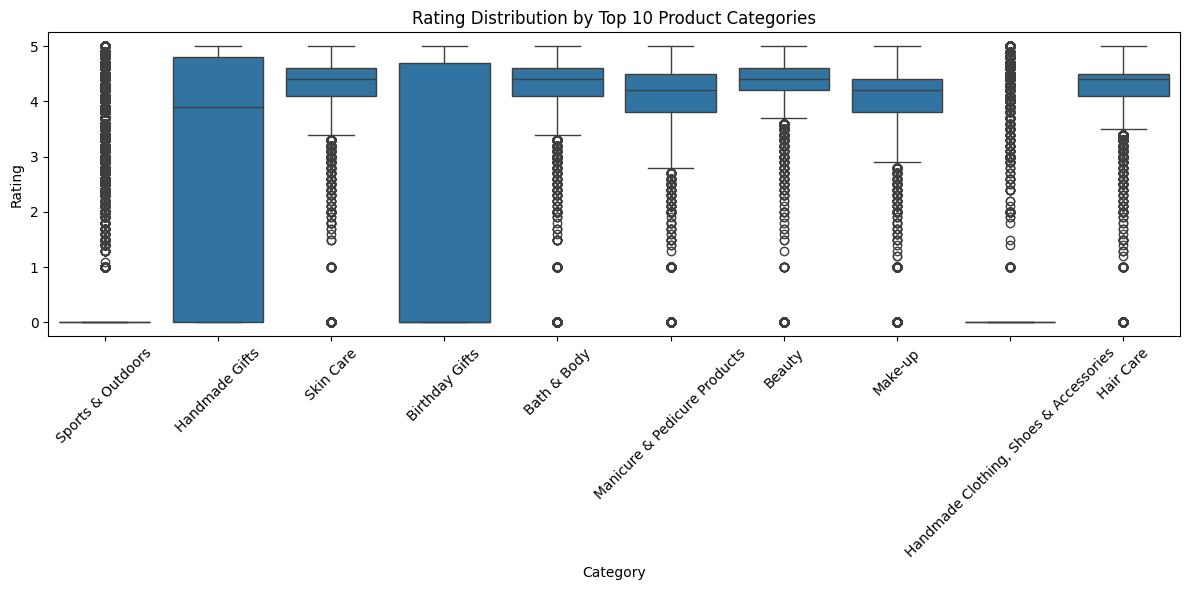

In [32]:
# Filter top 10 categories
top10_cat_rating = df_no_outliers['category'].value_counts().nlargest(10).index
df_rating_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_cat_rating)]

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=df_rating_top10)
plt.xticks(rotation=45)
plt.title('Rating Distribution by Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


In [34]:
median_ratings = df_no_outliers.groupby('category')['stars'].mean().sort_values(ascending=False)
print("Top categories by median rating:\n", median_ratings.head())


Top categories by median rating:
 category
Luxury Food & Drink       4.544140
Grocery                   4.469414
Laptop Accessories        4.449600
Health & Personal Care    4.439549
Arts & Crafts             4.432942
Name: stars, dtype: float64


In [35]:
# Drop missing values for accurate correlation
df_corr = df_no_outliers[['price', 'stars']].dropna()

# Calculate Pearson correlation
correlation = df_corr['price'].corr(df_corr['stars'])
print(f"Correlation between price and rating (stars): {correlation:.4f}")


Correlation between price and rating (stars): -0.0777


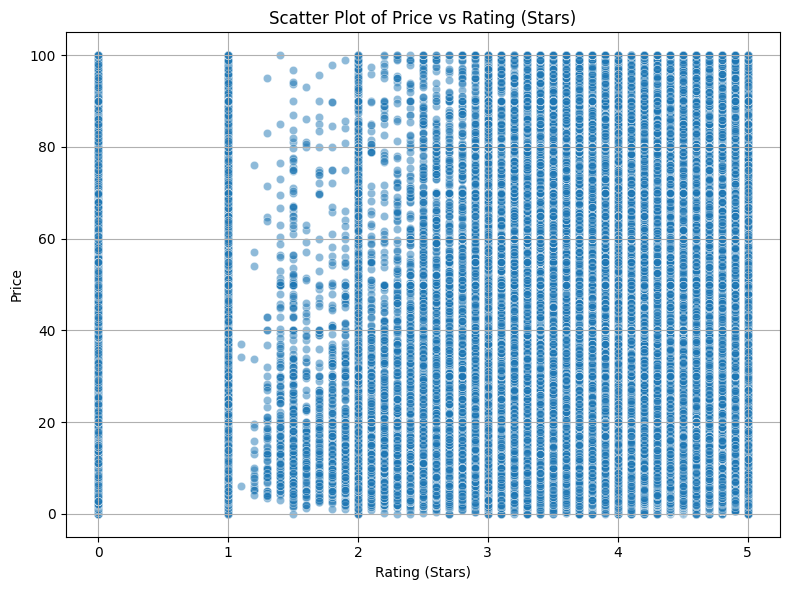

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='stars', y='price', data=df_corr, alpha=0.5)
plt.title('Scatter Plot of Price vs Rating (Stars)')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


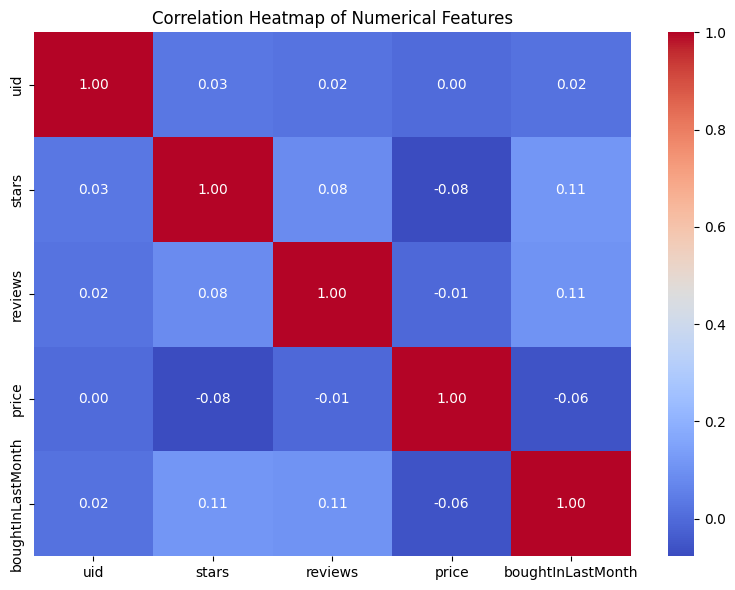

In [37]:
import numpy as np

# Select numerical columns
numeric_df = df_no_outliers.select_dtypes(include=np.number).dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


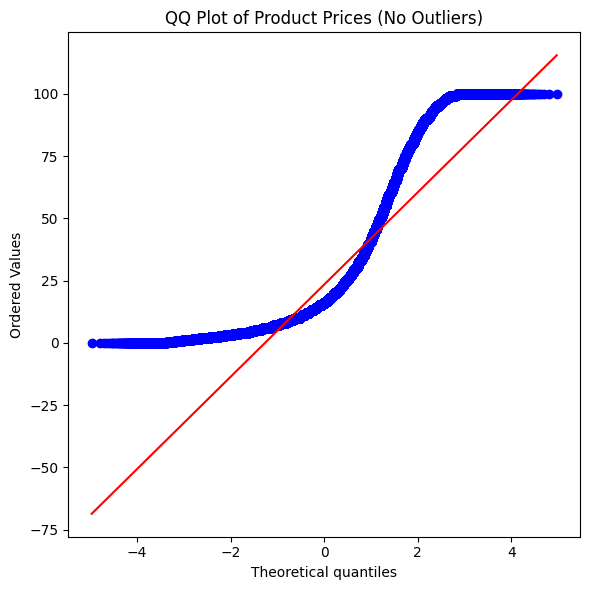

In [38]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices (No Outliers)")
plt.tight_layout()
plt.show()


In [39]:
# Correlation without removing outliers
df_with_corr = df[['price', 'stars']].dropna()
correlation_raw = df_with_corr['price'].corr(df_with_corr['stars'])
print(f"Correlation (with outliers): {correlation_raw:.4f}")


Correlation (with outliers): -0.1249
